In [ ]:
!pip install blocksnet==0.0.8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 81.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 63.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.6/355.6 kB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import blocksnet as bn
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt

In [ ]:
city = bn.City.from_pickle('small_model.pickle')

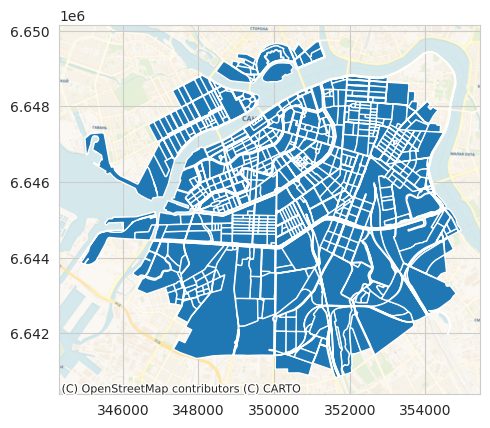

In [ ]:
ax = city.get_blocks_gdf(False).plot()
cx.add_basemap(ax, crs=city.crs, source=cx.providers.CartoDB.Voyager)

In [ ]:
from blocksnet import Integration, IntegrationType

In [ ]:
integ = Integration(city_model=city)

In [ ]:
result_local = integ.calculate(IntegrationType.LOCAL)

  0%|          | 0/7076 [00:00<?, ?it/s]

In [ ]:
result_local = result_local.drop(1249)

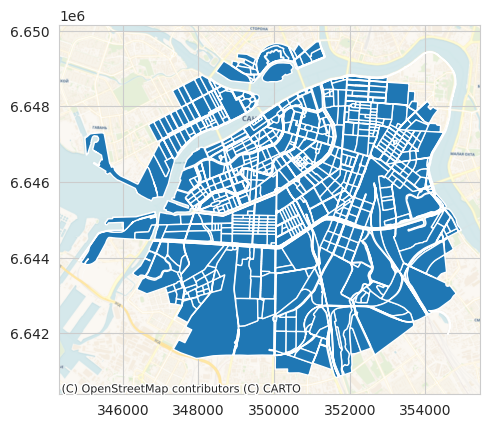

In [ ]:
ax = result_local.plot()
cx.add_basemap(ax, crs=city.crs, source=cx.providers.CartoDB.Voyager)

In [ ]:
n_clusters = 2

In [ ]:
clusters = integ.clusterize(result_local, n_clusters=n_clusters)

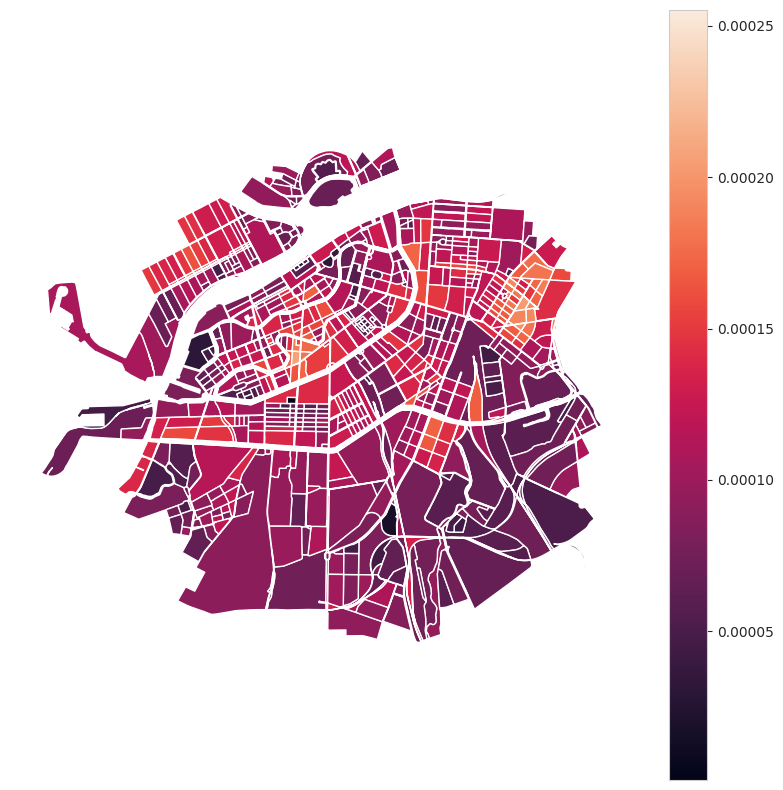

In [ ]:
integ.plot(clusters, column='integration')

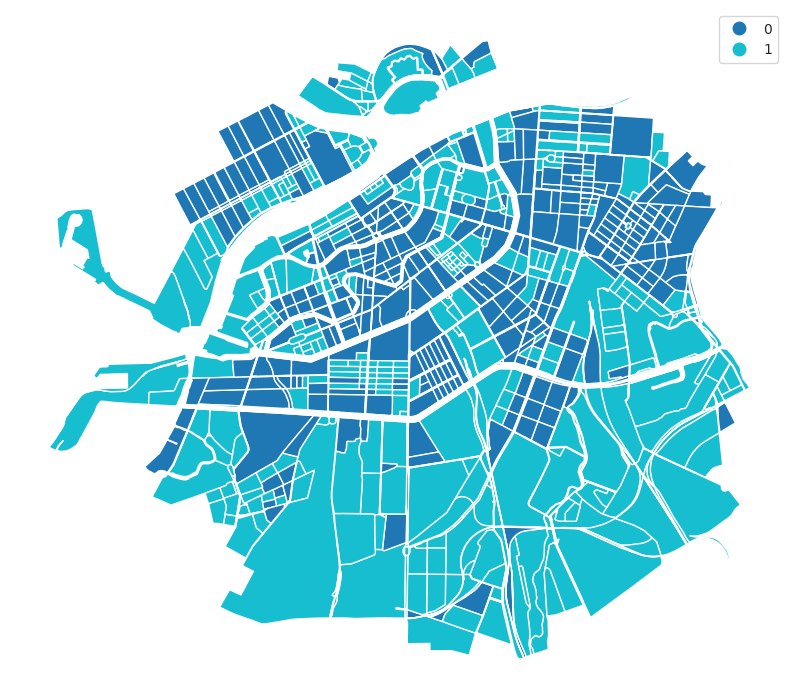

In [ ]:
integ.plot(clusters, column='cluster')

In [19]:
cluster_means = clusters.groupby('cluster').agg({'fsi': 'mean', 'integration': 'mean'}).reset_index()
cluster_means

,cluster,fsi,integration
0,0,0.796993,0.000137
1,1,0.423096,0.000078
